# S03 T02: Graphic visualization of multiple variables 

### Exercise 1

*Do the Practice notebook to GitHub "03 EXAMINING DATA" with seaborn and the dataset "tips".* 

In [116]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [5]:
url = 'https://github.com/IT-Academy-BCN/Data-Science/blob/main/Data-sources/tips.csv?raw=true'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.shape

(244, 7)

In [10]:
tips.ndim

2

In [8]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [12]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


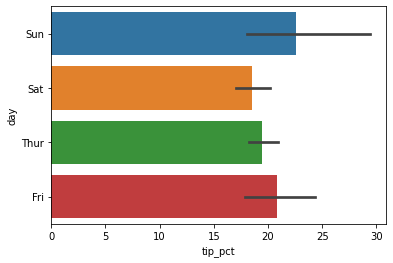

In [15]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

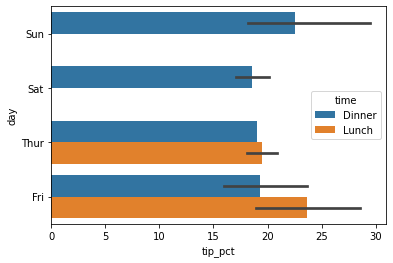

In [16]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [17]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [20]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [21]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [22]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [26]:
round((tips['tip']).median(), 3)

2.9

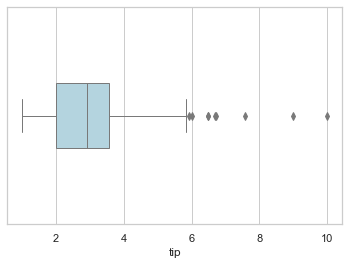

In [27]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

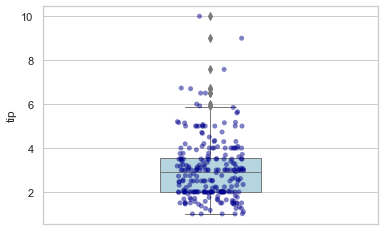

In [28]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

#### One Variable: 1 Numeric = 'tip_pct'

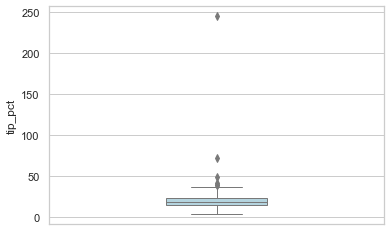

In [29]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

#### Two Variables: 1 Categoric = 'day', 1 Numeric = 'tip_pct'

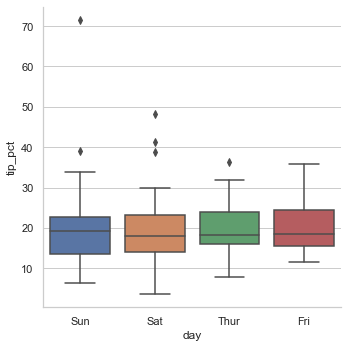

In [30]:
## categoric variable 'day' added in x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

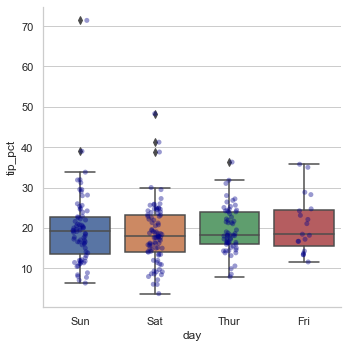

In [31]:
## categoric variable 'day' added in x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

#### Three Variables : 2 Categoric = ('day', 'time'), 1 Numeric = 'tip_pct'

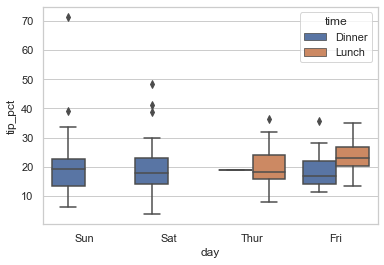

In [32]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

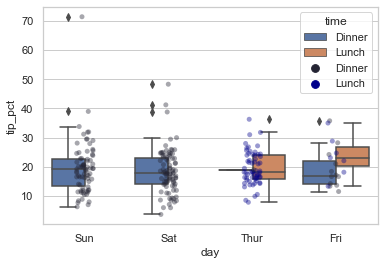

In [33]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

#### Facet Grids and Categorical DataFrame
One more categoric variable can be added.

Using the method factorplot( ) of "Facet Grid" :

Four Variables : 3 Categoric = ('day', 'time', 'smoker'), 1 Numeric = 'tip_pct'

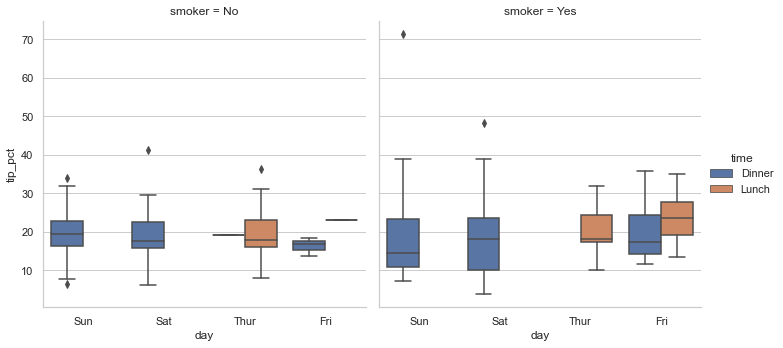

In [34]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

### Exercise 2 

*Repeat the exercise 1 with the dataset PRE-PROCESSING-DATA, movies.dat*

### and

### Exercise 3

*In this exercise there will be no indications given so you can show your creativity. Surprise us with graphics and interpretations of the previous exercise dataset "movies.dat".*

In [155]:
url2 = "https://github.com/IT-Academy-BCN/Data-Science/blob/main/Pre-processing-data/movies.dat?raw=true"

# Reading the file
movies = pd.read_csv(url2,
sep='::', encoding = 'ISO-8859-1', index_col=0, names=['Id','TitleYear','Genres'], engine='python')
movies.head()

,TitleYear,Genres
Id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [156]:
# Dividing Title and Year, using rsplit instead of split to consider the last delimiter
movies[['Title','Year']] = movies.TitleYear.str.rsplit("(", n=1, expand=True)
movies

,TitleYear,Genres,Title,Year
Id,,,,
1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995)
2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995)
3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995)
4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995)
5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995)
...,...,...,...,...
3948,Meet the Parents (2000),Comedy,Meet the Parents,2000)
3949,Requiem for a Dream (2000),Drama,Requiem for a Dream,2000)
3950,Tigerland (2000),Drama,Tigerland,2000)


In [157]:
# Removing the remaining parentheses in Year
movies["Year"] = movies["Year"].str.replace(")","")
movies.head()

,TitleYear,Genres,Title,Year
Id,,,,
1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [158]:
# Removing the column TitleYear 
movies = movies.drop(columns=['TitleYear'])
movies.head()

,Genres,Title,Year
Id,,,
1,Animation|Children's|Comedy,Toy Story,1995
2,Adventure|Children's|Fantasy,Jumanji,1995
3,Comedy|Romance,Grumpier Old Men,1995
4,Comedy|Drama,Waiting to Exhale,1995
5,Comedy,Father of the Bride Part II,1995


In [159]:
# Changing columns index
movies = movies[["Title", "Year", "Genres"]]
movies

,Title,Year,Genres
Id,,,
1,Toy Story,1995,Animation|Children's|Comedy
2,Jumanji,1995,Adventure|Children's|Fantasy
3,Grumpier Old Men,1995,Comedy|Romance
4,Waiting to Exhale,1995,Comedy|Drama
5,Father of the Bride Part II,1995,Comedy
...,...,...,...
3948,Meet the Parents,2000,Comedy
3949,Requiem for a Dream,2000,Drama
3950,Tigerland,2000,Drama


In [160]:
movies.shape

(3883, 3)

In [125]:
movies.ndim

2

In [161]:
movies.columns

Index(['Title', 'Year', 'Genres'], dtype='object')

In [127]:
# count no. of unique 
# values in Year column
n = movies.Year.nunique()
  
print("No.of.unique values in Year column :",
      n)

No.of.unique values in Year column : 81


In [278]:
# To display all rows
#pd.set_option('display.max_rows', movies.shape[0]+1)
#print(movies['Year'])

In [119]:
# Setting normal settings again
pd.reset_option('display.max_rows')

In [163]:
movies.describe()

,Title,Year,Genres
count,3883,3883,3883
unique,3841,81,301
top,Hamlet,1996,Drama
freq,5,345,843


In [164]:
#null values check
movies.isnull().sum()/len(movies)

Title     0.0
Year      0.0
Genres    0.0
dtype: float64

In [167]:
#media value in Year
(movies['Year']).median().round(3)

1994.0

#### One Variable: 1 Numeric = 'Year'

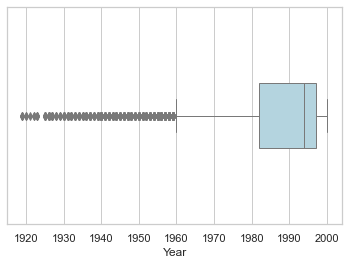

In [175]:
#boxplot casting Year as int
sns.set(style="whitegrid")
ax = sns.boxplot(x = movies['Year'].astype(int), color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

Any observation that lies beyond the whiskers is labeled with a dot. The purpose of labeling these points – instead of just extending the whiskers to the minimum and maximum observed values – is to help identify any observations that appear to be unusually distant from the rest of the data. Unusually distant observations are called Outliers.

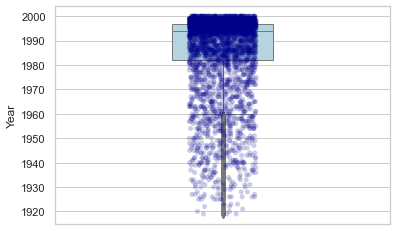

In [200]:
ax = sns.boxplot(y=movies["Year"].astype(int),  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=movies["Year"].astype(int), orient='v', color='darkblue', alpha= 0.2)

#### Two Variables: 1 Categoric = 'Genres', 1 Numeric = 'Year'

In [192]:
#casting the whole Year column to int
movies['Year'] = pd.to_numeric(movies['Year'])

In [193]:
movies.dtypes

Title     object
Year       int64
Genres    object
dtype: object

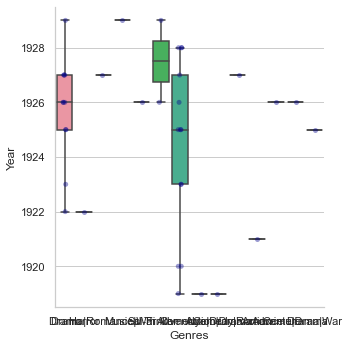

In [277]:
#selected just the movies before 1930 just to be able to get a better graphic, just for practice
ax = sns.catplot(x='Genres', y='Year', kind='box',
                 data=movies[movies.Year < 1930]);
ax = sns.stripplot(x='Genres', y='Year', data=movies[movies.Year < 1930], orient='v', color='darkblue', alpha= 0.4);

#### Three Variables : 2 Categoric = ('Title', 'Genres'), 1 Numeric = 'Year'

*Applying other graphs depending on the variables*  

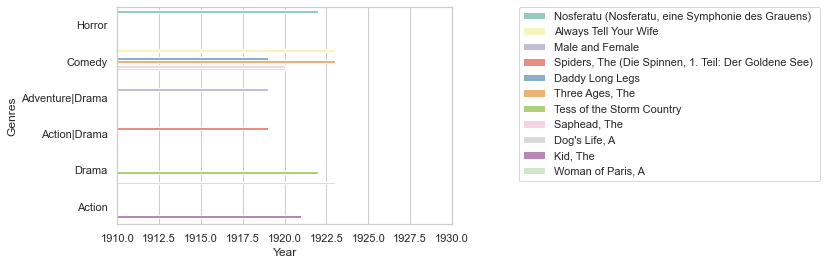

In [274]:
#barplot for movies before the year 1925, classified by Genres
sns.barplot(x="Year", y="Genres", hue="Title", data=movies[movies.Year < 1925], ci=None, palette="Set3");

plt.xlim(1910, 1930)
plt.legend(bbox_to_anchor=(1.20, 1), loc='upper left', borderaxespad=0)

#### Plot one categoric variable

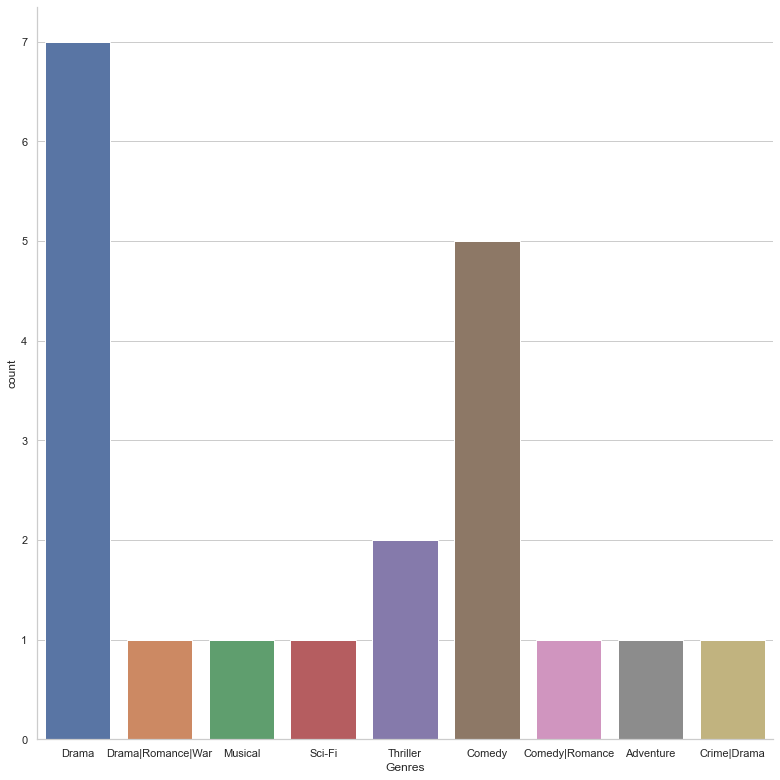

In [258]:
#plot showing bar counts for movies Genres between the year 1925 and 1930
sns.catplot(x='Genres', data=movies[(movies.Year > 1925) & (movies.Year < 1930)], kind='count', size=11);

#### One categoric and numeric variable

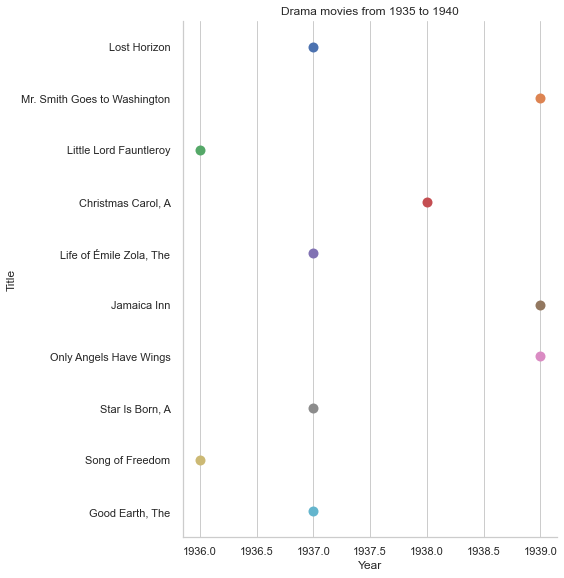

In [270]:
#Plot showing drama movies from the year 1935 to 1940
sns.catplot(x="Year", y="Title", kind="swarm", 
            data=movies[(movies.Genres == 'Drama') & (movies.Year < 1940) & (movies.Year > 1935)], 
            size=8, s=10).set(title='Drama movies from 1935 to 1940')